In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [34]:
image = cv2.imread(r"C:\Program Files (x86)\autonomous_car_project\data_example\f.jpg")

In [35]:
lane_image = np.copy(image)

In [36]:
def make_coordinates(image , line_parameters):
    slope , intercept = line_parameters
    y1 = image.shape[0]
    y2 = int(y1*(3/5))
    x1 = int((y1-intercept)/slope)
    x2 = int((y2 - intercept)/slope)
    return np.array([x1 , y1 ,x2 ,y2])

In [37]:
def average_slope_intercept(image , lines):
    left_fit = []
    right_fit = []
    for line in lines:
        x1,y1,x2,y2 = line.reshape(4)
        parameters = np.polyfit((x1,x2) , (y1 , y2) , 1)
        slope = parameters[0]
        intercept = parameters[1]
        if slope < 0:
            left_fit.append((slope , intercept))
        else:
            right_fit.append((slope , intercept))
    left_fit_average = np.average (left_fit , axis=0)
    right_fit_average = np.average (right_fit , axis=0)
    print(left_fit_average , "left")
    print(right_fit_average , "right")
    left_line = make_coordinates(image , left_fit_average)
    right_line = make_coordinates(image , right_fit_average)
    return np.array([left_line , right_line])

In [38]:
def canny(image):
    gray = cv2.cvtColor(image , cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray , (5,5), 0)
    canny = cv2.Canny(blur,50,150)
    return canny

In [39]:
canny_image = canny(lane_image)

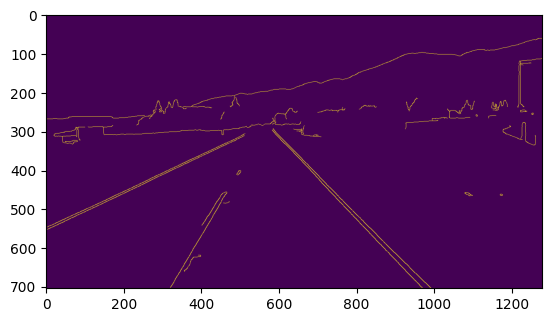

In [40]:
plt.imshow(canny_image)

In [41]:
def region_of_interest(image):
    height = image.shape[0]
    triangle = np.array([[(200 , height), (1100 , height), (550,250)]], np.int32)
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, triangle, 255)
    masked_image = cv2.bitwise_and(image,mask)

    return masked_image

In [42]:
cropped_image = region_of_interest(canny_image)


In [43]:
def display_lines (image , lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for x1 ,y1 ,x2 , y2  in lines:
            cv2.line(line_image , (x1,y1) , (x2,y2) , (255,0,0) , 10)
    return line_image


In [44]:
lines = cv2.HoughLinesP(cropped_image , 2,np.pi/180,100,np.array([]), minLineLength=40 , maxLineGap=5)
averaged_lines = average_slope_intercept(lane_image , lines)
line_image = display_lines(lane_image , averaged_lines)

[  -1.61019355 1201.00387097] left
[   1.0243751  -298.80648538] right


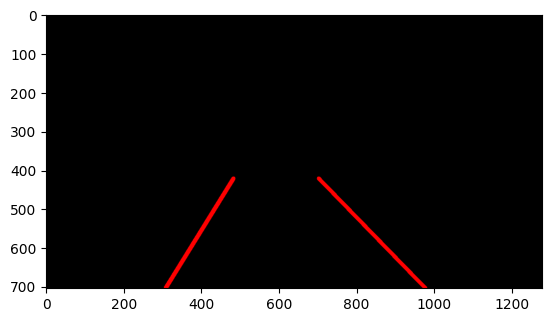

In [45]:
plt.imshow(line_image)

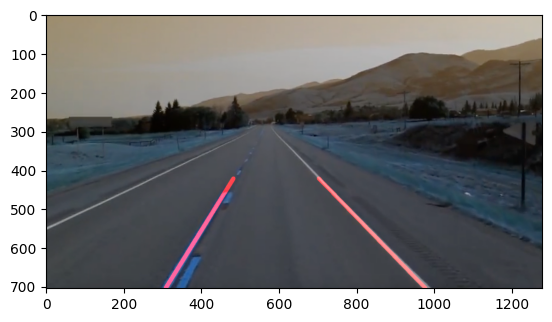

In [46]:
combo_image = cv2.addWeighted(lane_image , 0.8 , line_image , 1 ,1)
plt.imshow(combo_image)


In [ ]:
cap = cv2.VideoCapture(r"C:\Program Files (x86)\autonomous_car_project\data_example\test2.mp4")
while(cap.isOpened()):
    _ , frame = cap.read()
    canny_image = canny(frame)
    cropped_image = region_of_interest(canny_image)
    lines = cv2.HoughLinesP(cropped_image , 2,np.pi/180,100,np.array([]), minLineLength=40 , maxLineGap=5)
    averaged_lines = average_slope_intercept(frame , lines)
    line_image = display_lines(frame , averaged_lines)
    combo_image = cv2.addWeighted(frame , 0.8 , line_image , 1 ,1)
    cv2.imshow("result" , combo_image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

'cap = cv2.VideoCapture(r"C:\\Program Files (x86)\x07utonomous_car_project\\data_example\test2.mp4")\nwhile(cap.isOpened()):\n    _ , frame = cap.read()\n    canny_image = canny(frame)\n    cropped_image = region_of_interest(canny_image)\n    lines = cv2.HoughLinesP(cropped_image , 2,np.pi/180,100,np.array([]), minLineLength=40 , maxLineGap=5)\n    averaged_lines = average_slope_intercept(frame , lines)\n    line_image = display_lines(frame , averaged_lines)\n    combo_image = cv2.addWeighted(frame , 0.8 , line_image , 1 ,1)\n    cv2.imshow("result" , combo_image)\n    if cv2.waitKey(1) & 0xFF == ord(\'q\'):\n        break\ncv2.destroyAllWindows()'